In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
#importing the data
UK_cases = pd.read_csv("covid_19_uk_cases.csv")
UK_vaccinated = pd.read_csv("covid_19_uk_vaccinated.csv")
global_data = pd.read_csv("global_data.csv")
tweets = pd.read_csv("tweets.csv")

In [2]:
global_data.shape

(279, 636)

In [3]:
global_data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/5/21', '10/6/21', '10/7/21', '10/8/21', '10/9/21', '10/10/21',
       '10/11/21', '10/12/21', '10/13/21', '10/14/21'],
      dtype='object', length=636)

In [4]:
df_g = global_data.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                        var_name="Date", 
                        value_name="Cases")

In [5]:
df_g.shape

(176328, 6)

In [6]:
df_g.isnull().sum()

Province/State    121344
Country/Region         0
Lat                 1264
Long                1264
Date                   0
Cases                  0
dtype: int64

In [7]:
#find the non NaN values
def nans(df_g): return df_g[~df_g.isnull().any(axis=1)]
nans(df_g)

,Province/State,Country/Region,Lat,Long,Date,Cases
8,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0
9,New South Wales,Australia,-33.868800,151.209300,1/22/20,0
10,Northern Territory,Australia,-12.463400,130.845600,1/22/20,0
11,Queensland,Australia,-27.469800,153.025100,1/22/20,0
12,South Australia,Australia,-34.928500,138.600700,1/22/20,0
...,...,...,...,...,...,...
176313,Gibraltar,United Kingdom,36.140800,-5.353600,10/14/21,5727
176314,Isle of Man,United Kingdom,54.236100,-4.548100,10/14/21,8343
176315,Montserrat,United Kingdom,16.742498,-62.187366,10/14/21,41
176316,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,10/14/21,4


In [8]:
#checking the data relevant to the UK in the first df (global data)
Uk_cases2 = df_g[df_g['Country/Region'] == 'United Kingdom']
Uk_cases2.shape

(7584, 6)

In [9]:
#checking the data relevant to the UK in the secon df(UK_cases)
UK_cases.shape

(7584, 12)

In [10]:
#a few extra checks 
df_g["Country/Region"].value_counts()

China             21488
Canada            10112
United Kingdom     7584
France             7584
Australia          5056
                  ...  
Guatemala           632
Guinea              632
Guinea-Bissau       632
Guyana              632
Zimbabwe            632
Name: Country/Region, Length: 195, dtype: int64

In [11]:
df_g.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Cases               int64
dtype: object

In [12]:
#converting column Date into datetime 
df_g['Date'] = df_g['Date'].astype('datetime64')

In [13]:
#checking the result
df_g.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Cases                      int64
dtype: object

In [14]:
overall = df_g.groupby("Date")[["Cases"]].max()

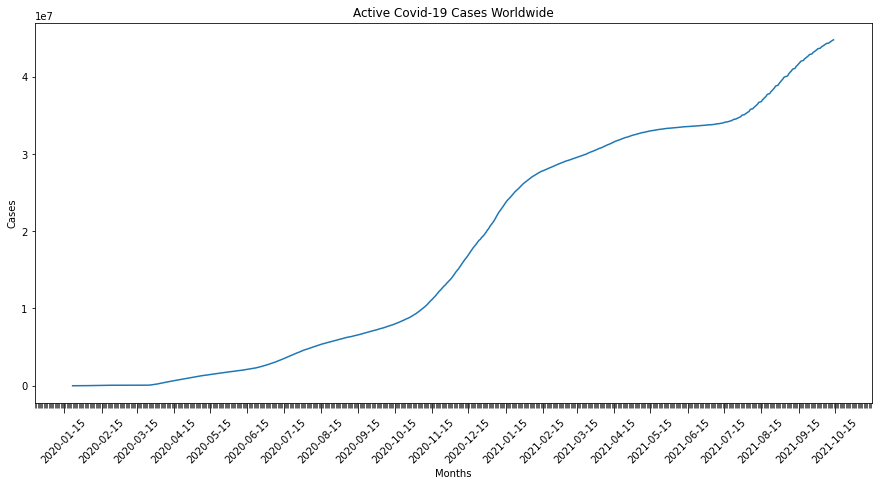

In [15]:
#Overall view ---- Covid cases worldwide

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax = ax, x='Date', y='Cases', data=overall, ci = None).set_title('Active Covid-19 Cases Worldwide')

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=15))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Months')
plt.ylabel('Cases')

# show the plot
plt.show()

In [16]:
#importing a new dataset I will use to determine to which continent each Country/Region belongs
continents = pd.read_csv('continents.txt')

In [17]:
#check the new df
continents

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [18]:
#checking the duplicated
continents.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
189    False
190    False
191    False
192    False
193    False
Length: 194, dtype: bool

In [19]:
continents.columns

Index(['Continent', 'Country'], dtype='object')

In [20]:
#renaming the column I need to use to relate the two df's 
continents = continents.rename(columns={"Country": "Country/Region"})

In [21]:
#merine the two df's 
df_gc = pd.merge(df_g, continents, on='Country/Region', how='left')

In [22]:
df_gc

,Province/State,Country/Region,Lat,Long,Date,Cases,Continent
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,Asia
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,Africa
...,...,...,...,...,...,...,...
176323,NaN,Vietnam,14.058324,108.277199,2021-10-14,853842,Asia
176324,NaN,West Bank and Gaza,31.952200,35.233200,2021-10-14,446294,NaN
176325,NaN,Yemen,15.552727,48.516388,2021-10-14,9467,Asia
176326,NaN,Zambia,-13.133897,27.849332,2021-10-14,209431,Africa


In [23]:
df_gcp = pd.pivot_table(df_gc, index = "Date", values = ["Cases"], aggfunc = "max")

In [24]:
group_data = df_gc.groupby(['Date','Country/Region'])['Cases'].max()
group_data

Date        Country/Region    
2020-01-22  Afghanistan                0
            Albania                    0
            Algeria                    0
            Andorra                    0
            Angola                     0
                                   ...  
2021-10-14  Vietnam               853842
            West Bank and Gaza    446294
            Yemen                   9467
            Zambia                209431
            Zimbabwe              132251
Name: Cases, Length: 123240, dtype: int64

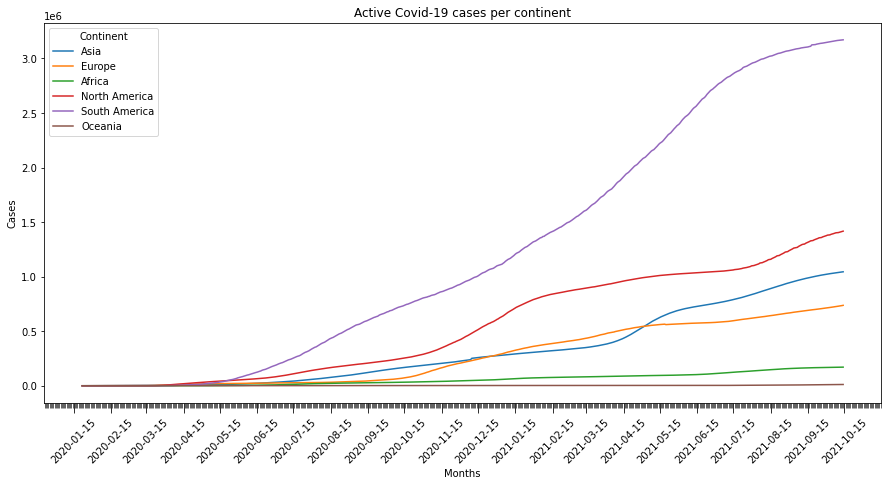

In [50]:
# continents view

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax = ax, x='Date',
             y='Cases', data=df_gc, ci = None, hue = "Continent").set_title('Active Covid-19 cases per continent')
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=15))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 45° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Months')
plt.ylabel('Cases')

# show the plot
plt.show()

In [26]:
# What the total vaccinations are for a particular region within the UK? 

In [27]:
UK_vaccinated.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Vaccinated', 'First Dose',
       'Second Dose'],
      dtype='object')

In [28]:
UK_vaccinated_pivot = pd.pivot_table(UK_vaccinated, index = "Province/State", values = ["First Dose", 
                                                                                        "Second Dose", 
                                                                                        "Vaccinated"], aggfunc = "max")
UK_vaccinated_pivot

,First Dose,Second Dose,Vaccinated
Province/State,,,
Anguilla,78992,58480,58480
Bermuda,45138,33417,33417
British Virgin Islands,82754,61265,61265
Cayman Islands,56423,41771,41771
Channel Islands,52662,38987,38987
Falkland Islands (Malvinas),60185,44556,44556
Gibraltar,94038,69619,69619
Isle of Man,67708,50126,50126
Montserrat,86515,64049,64049


In [29]:
#area(s) with the largest number of people who have received a first dose but no second dose 

In [30]:
UK_vaccinated_pivot['Only first Dose'] = UK_vaccinated_pivot['First Dose'] - UK_vaccinated_pivot['Second Dose']

In [31]:
h = UK_vaccinated_pivot.sort_values(by=('Only first Dose'),ascending=False)
h

,First Dose,Second Dose,Vaccinated,Only first Dose
Province/State,,,,
Gibraltar,94038,69619,69619,24419
Montserrat,86515,64049,64049,22466
British Virgin Islands,82754,61265,61265,21489
Anguilla,78992,58480,58480,20512
Isle of Man,67708,50126,50126,17582
Falkland Islands (Malvinas),60185,44556,44556,15629
Cayman Islands,56423,41771,41771,14652
Channel Islands,52662,38987,38987,13675
Turks and Caicos Islands,48900,36202,36202,12698


In [32]:
df_t = h.reset_index()

In [33]:
df_t

,Province/State,First Dose,Second Dose,Vaccinated,Only first Dose
0,Gibraltar,94038,69619,69619,24419
1,Montserrat,86515,64049,64049,22466
2,British Virgin Islands,82754,61265,61265,21489
3,Anguilla,78992,58480,58480,20512
4,Isle of Man,67708,50126,50126,17582
5,Falkland Islands (Malvinas),60185,44556,44556,15629
6,Cayman Islands,56423,41771,41771,14652
7,Channel Islands,52662,38987,38987,13675
8,Turks and Caicos Islands,48900,36202,36202,12698
9,Bermuda,45138,33417,33417,11721


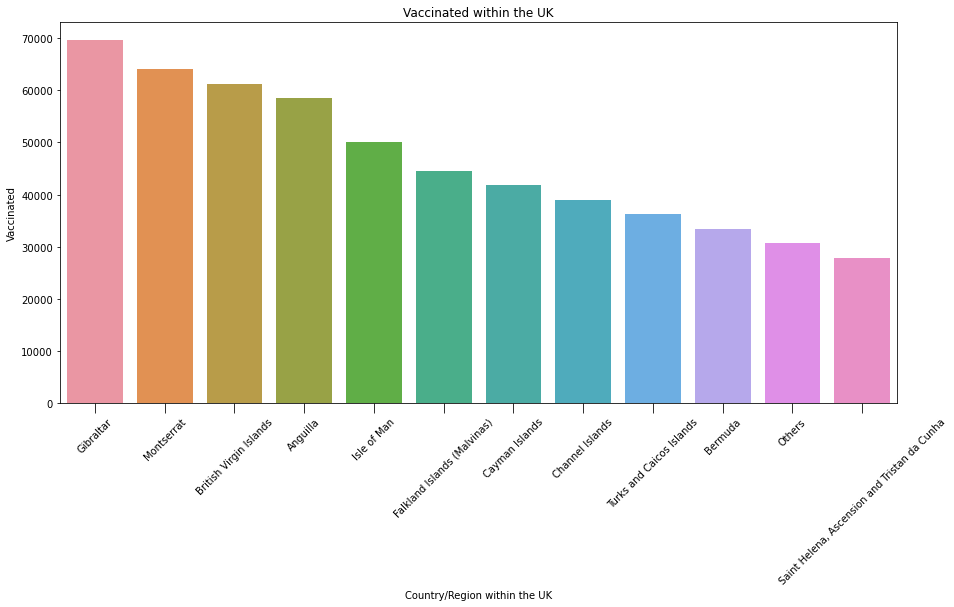

In [45]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.barplot(ax = ax, x='Province/State', y='Vaccinated', data=df_t).set_title('Vaccinated within the UK')

# (optional) rotate by 45° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Country/Region within the UK')
plt.ylabel('Vaccinated')

# show the plot
plt.show()

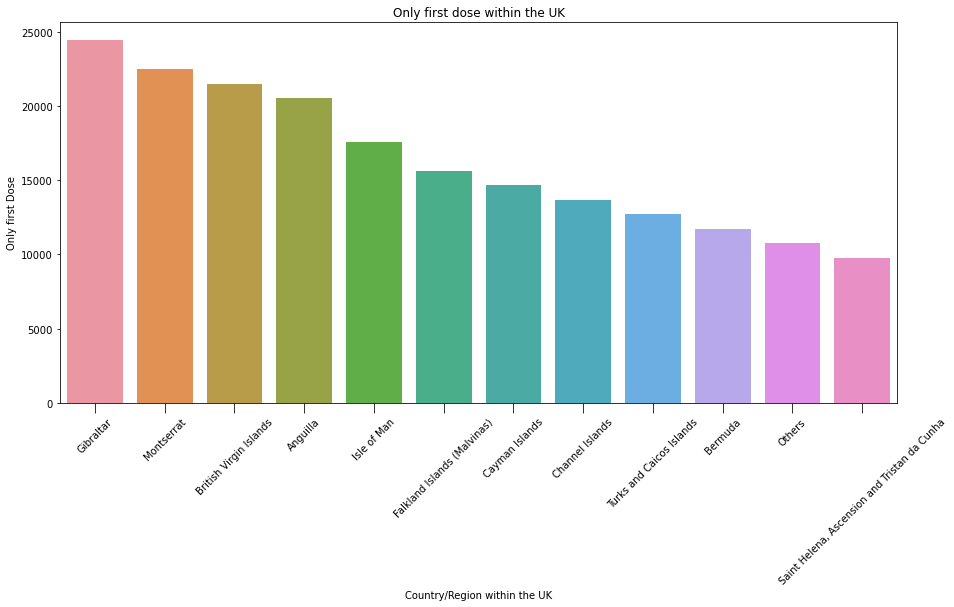

In [34]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.barplot(ax = ax, x='Province/State', y='Only first Dose', data=df_t).set_title('Only first dose within the UK')

# (optional) rotate by 45° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Country/Region within the UK')
plt.ylabel('Only first Dose')

# show the plot
plt.show()

In [35]:
#which area has the greatest number of recoveries 

In [36]:
UK_cases_pivot = pd.pivot_table(UK_cases, index = "Province/State", values = ["Recovered"], aggfunc = "max")

In [37]:
rec = UK_cases_pivot.sort_values(by=('Recovered'),ascending=False)
rec

,Recovered
Province/State,
Channel Islands,8322.0
Gibraltar,4670.0
Isle of Man,4019.0
Bermuda,2503.0
Turks and Caicos Islands,2433.0
British Virgin Islands,1914.0
Cayman Islands,635.0
Others,344.0
Anguilla,111.0


In [38]:
df_ri = rec.reset_index()

In [39]:
df_ri

,Province/State,Recovered
0,Channel Islands,8322.0
1,Gibraltar,4670.0
2,Isle of Man,4019.0
3,Bermuda,2503.0
4,Turks and Caicos Islands,2433.0
5,British Virgin Islands,1914.0
6,Cayman Islands,635.0
7,Others,344.0
8,Anguilla,111.0
9,Falkland Islands (Malvinas),63.0


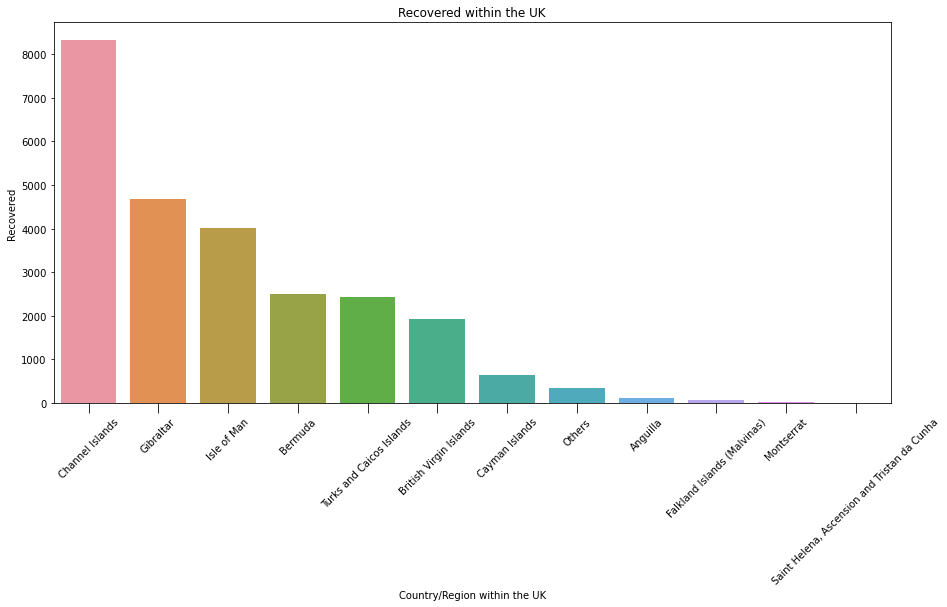

In [40]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.barplot(ax = ax, x='Province/State', y='Recovered', data=df_ri).set_title('Recovered within the UK')

# (optional) rotate by 45° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Country/Region within the UK')
plt.ylabel('Recovered')

# show the plot
plt.show()

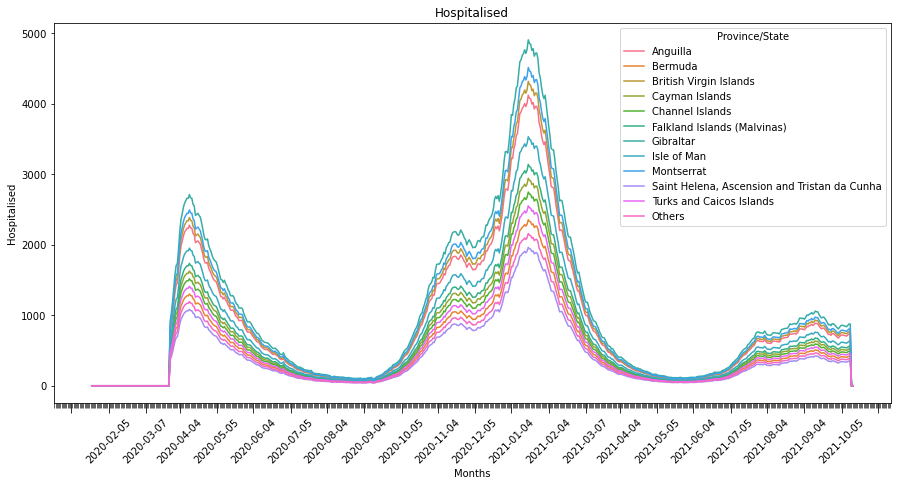

In [44]:
# continents view

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax = ax, x='Date', y='Hospitalised', data=UK_cases, ci = None, hue = "Province/State").set_title('Hospitalised')
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=15))
# specify the format of the labels as 'year-month-day'

# (optional) rotate by 45° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Months')
plt.ylabel('Hospitalised')

# show the plot
plt.show()

In [57]:
tweets.head()

,Unnamed: 0,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,0,Sun Mar 13 22:37:31 +0000 2022,1503138212692344832,1503138212692344832,RT @SixandLaura: Detection of a Novel &amp; Hi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,1,Sun Mar 13 22:36:52 +0000 2022,1503138051052253190,1503138051052253190,"RT @IranNewsUpdate1: #IranProtests\n#Tehran, #...",False,"{'hashtags': [{'text': 'IranProtests', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2,2,Sun Mar 13 22:35:43 +0000 2022,1503137759002693634,1503137759002693634,Former President Barack #Obama has tested #pos...,True,"{'hashtags': [{'text': 'Obama', 'indices': [24...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
3,3,Sun Mar 13 22:34:54 +0000 2022,1503137553632923655,1503137553632923655,RT @OldPrague: - China put all 17 million resi...,False,"{'hashtags': [{'text': 'Schengen', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,3,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,4,Sun Mar 13 22:32:24 +0000 2022,1503136923585589253,1503136923585589253,RT @butterygoods: Sub variant of Omicron BA.2 ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5,0,False,False,en,NaN,NaN,NaN,NaN,NaN


In [80]:
tweetsec = tweets[tweets.text.str.contains(r'(?=.*#coronavirus)')]
tweetsec

,Unnamed: 0,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
2,2,Sun Mar 13 22:35:43 +0000 2022,1503137759002693634,1503137759002693634,Former President Barack #Obama has tested #pos...,True,"{'hashtags': [{'text': 'Obama', 'indices': [24...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
5,5,Sun Mar 13 22:32:21 +0000 2022,1503136912403480580,1503136912403480580,Available #vaccines have been designed against...,True,"{'hashtags': [{'text': 'vaccines', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,2,False,False,en,False,1.503109e+18,1.503109e+18,{'created_at': 'Sun Mar 13 20:41:42 +0000 2022...,NaN
12,12,Sun Mar 13 22:27:29 +0000 2022,1503135688325312517,1503135688325312517,#China’s government has responded to a sharp r...,True,"{'hashtags': [{'text': 'China', 'indices': [0,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,0,False,False,en,False,NaN,NaN,NaN,NaN
